In [51]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
%matplotlib inline


In [13]:
epl=pd.read_csv('/Users/sarahelfeel/Downloads/archive-2/EPL_21_22.csv')

In [14]:
epl.head()

,players,nation,pos,club,age,weekly,mp,starts,minutes,90s,goals,assists,nonpkg,pkmade,pkatt,yellowcrd,redcrd,shots,shtont
0,Max Aarons,ENG,DF,Norwich City,21,22500,34,32,2881,32.0,0,2,0,0,0,8,0,13,2
1,Rayan Ait Nouri,FRA,DF,Wolves,20,4423,23,20,1828,20.3,1,2,1,0,0,4,0,13,4
2,Kristoffer Ajer,NOR,DF,Brentford,23,22115,24,23,1995,22.2,1,3,1,0,0,5,0,7,1
3,Nathan Ake,NED,DF,Manchester City,26,92308,14,10,923,10.3,2,0,2,0,0,0,0,5,2
4,Trent Alexander-Arnold,ENG,DF,Liverpool,22,180000,32,32,2853,31.7,2,12,2,0,0,2,0,51,14


In [16]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   players    470 non-null    object 
 1   nation     470 non-null    object 
 2   pos        470 non-null    object 
 3   club       470 non-null    object 
 4   age        470 non-null    int64  
 5   weekly     470 non-null    int64  
 6   mp         470 non-null    int64  
 7   starts     470 non-null    int64  
 8   minutes    470 non-null    int64  
 9   90s        470 non-null    float64
 10  goals      470 non-null    int64  
 11  assists    470 non-null    int64  
 12  nonpkg     470 non-null    int64  
 13  pkmade     470 non-null    int64  
 14  pkatt      470 non-null    int64  
 15  yellowcrd  470 non-null    int64  
 16  redcrd     470 non-null    int64  
 17  shots      470 non-null    int64  
 18  shtont     470 non-null    int64  
dtypes: float64(1), int64(14), object(4)
memory usage: 

In [17]:
epl.describe()

,age,weekly,mp,starts,minutes,90s,goals,assists,nonpkg,pkmade,pkatt,yellowcrd,redcrd,shots,shtont
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,26.129787,62914.902128,21.582979,17.440426,1564.461702,17.381489,2.146809,1.561702,1.976596,0.170213,0.206383,2.789362,0.089362,19.951064,6.531915
std,4.065845,64643.687337,10.480794,10.944893,950.968602,10.565219,3.396621,2.124941,3.070856,0.703908,0.822110,2.583425,0.300131,21.730265,8.142261
min,17.000000,769.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,21250.000000,13.250000,8.000000,800.250000,8.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000
50%,26.000000,45000.000000,23.000000,17.000000,1497.000000,16.600000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,13.000000,4.000000
75%,29.000000,80000.000000,30.000000,26.000000,2295.250000,25.475000,3.000000,2.000000,2.750000,0.000000,0.000000,4.000000,0.000000,29.000000,9.000000
max,39.000000,515385.000000,38.000000,38.000000,3420.000000,38.000000,23.000000,13.000000,23.000000,6.000000,7.000000,11.000000,2.000000,134.000000,51.000000


In [18]:
epl.isna().sum()

players      0
nation       0
pos          0
club         0
age          0
weekly       0
mp           0
starts       0
minutes      0
90s          0
goals        0
assists      0
nonpkg       0
pkmade       0
pkatt        0
yellowcrd    0
redcrd       0
shots        0
shtont       0
dtype: int64

In [19]:
#create a column for goals per game and assists per game

epl['GoalPerGame']=(epl['goals'])/(epl['mp']).astype(float)
epl['AssistPerGame']=(epl['assists'])/(epl['mp']).astype(float)


epl.head()

,players,nation,pos,club,age,weekly,mp,starts,minutes,90s,...,assists,nonpkg,pkmade,pkatt,yellowcrd,redcrd,shots,shtont,GoalPerGame,AssistPerGame
0,Max Aarons,ENG,DF,Norwich City,21,22500,34,32,2881,32.0,...,2,0,0,0,8,0,13,2,0.000000,0.058824
1,Rayan Ait Nouri,FRA,DF,Wolves,20,4423,23,20,1828,20.3,...,2,1,0,0,4,0,13,4,0.043478,0.086957
2,Kristoffer Ajer,NOR,DF,Brentford,23,22115,24,23,1995,22.2,...,3,1,0,0,5,0,7,1,0.041667,0.125000
3,Nathan Ake,NED,DF,Manchester City,26,92308,14,10,923,10.3,...,0,2,0,0,0,0,5,2,0.142857,0.000000
4,Trent Alexander-Arnold,ENG,DF,Liverpool,22,180000,32,32,2853,31.7,...,12,2,0,0,2,0,51,14,0.062500,0.375000


In [20]:
#Total Goals scored in 21/22 season
total_goals = epl['goals'].sum()
print(total_goals)

1009


In [21]:
#Total penalty goals
total_penalties=epl['pkmade'].sum()
total_penalties_attempted=epl['pkatt'].sum()
pens_success=total_penalties/total_penalties_attempted
print(pens_success*100)

82.4742268041237


Text(0.5, 1.0, 'Penality success rate')

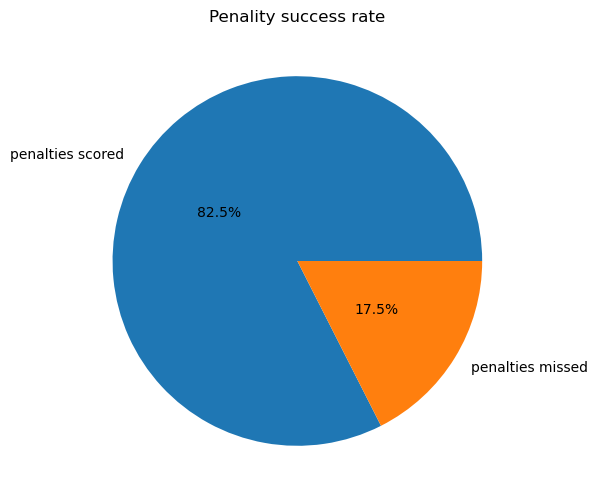

In [22]:
#pie chart for penalty success
plt.figure(figsize=(13,6))
penalties_comp=np.array([total_penalties, total_penalties_attempted-total_penalties])
labels=np.array(["penalties scored", "penalties missed"])
#plt.pie(penalties_comp)
plt.pie(x=penalties_comp, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Penality success rate")

In [23]:
#all defenders in the league
unique_pos = epl['pos'].unique()
epl[epl['pos']=='DF']


,players,nation,pos,club,age,weekly,mp,starts,minutes,90s,...,assists,nonpkg,pkmade,pkatt,yellowcrd,redcrd,shots,shtont,GoalPerGame,AssistPerGame
0,Max Aarons,ENG,DF,Norwich City,21,22500,34,32,2881,32.0,...,2,0,0,0,8,0,13,2,0.000000,0.058824
1,Rayan Ait Nouri,FRA,DF,Wolves,20,4423,23,20,1828,20.3,...,2,1,0,0,4,0,13,4,0.043478,0.086957
2,Kristoffer Ajer,NOR,DF,Brentford,23,22115,24,23,1995,22.2,...,3,1,0,0,5,0,7,1,0.041667,0.125000
3,Nathan Ake,NED,DF,Manchester City,26,92308,14,10,923,10.3,...,0,2,0,0,0,0,5,2,0.142857,0.000000
4,Trent Alexander-Arnold,ENG,DF,Liverpool,22,180000,32,32,2853,31.7,...,12,2,0,0,2,0,51,14,0.062500,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Ben White,ENG,DF,Arsenal,23,120000,32,32,2880,32.0,...,0,0,0,0,3,0,12,3,0.000000,0.000000
167,Brandon Williams,ENG,DF,Norwich City,20,65000,26,23,2120,23.6,...,1,0,0,0,8,0,4,1,0.000000,0.038462
168,Christoph Zimmermann,GER,DF,Norwich City,28,19423,3,2,157,1.7,...,0,0,0,0,0,0,2,1,0.000000,0.000000
169,Oleksandr Zinchenko,UKR,DF,Manchester City,24,20000,15,10,1047,11.6,...,4,0,0,0,0,0,12,4,0.000000,0.266667


In [35]:
#all nationalities
nations=np.size((epl['nation'].unique()))
print(nations)

60


<Axes: title={'center': 'nations with most players'}, xlabel='nation'>

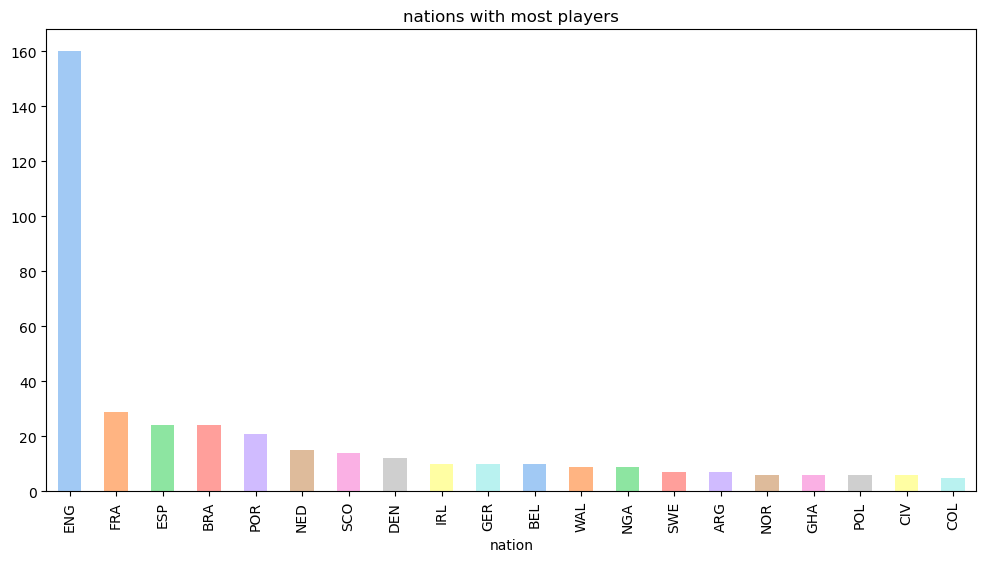

In [30]:
#countries with most players
most_country=epl.groupby('nation').size().sort_values(ascending=False)
most_country.head(20).plot(kind="bar", figsize=(12,6), color=sns.color_palette("pastel"), title="nations with most players")

<Axes: title={'center': 'clubs with biggest squad/most players'}>

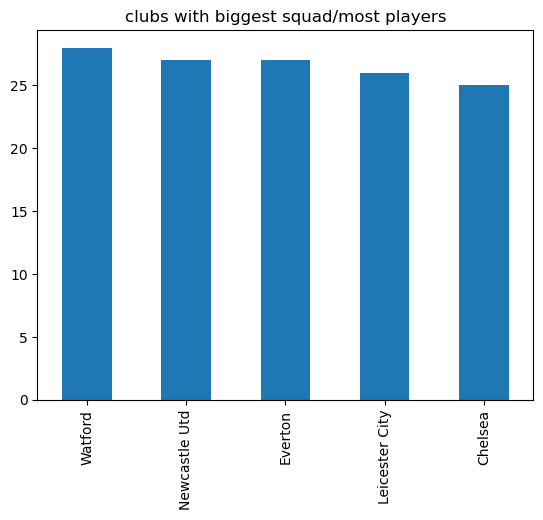

In [31]:
#clubs with most players
most_players=epl['club'].value_counts()
most_players.nlargest(5).plot(kind='bar', title='clubs with biggest squad/most players')

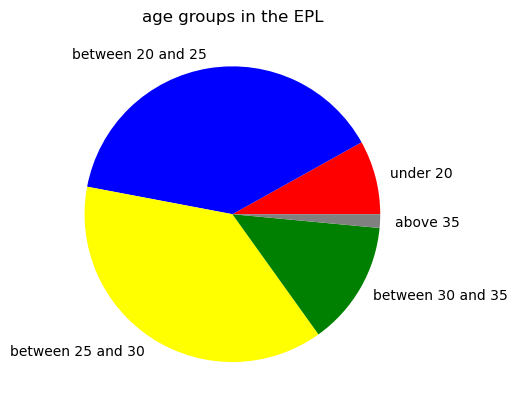

In [32]:
#age groups
Under20=epl[epl['age']<=20]
Between20_25=epl[(epl['age']<=25) & (epl['age']>20)]
Between25_30=epl[(epl['age']<=30) & (epl['age']>25)]
Between30_35=epl[(epl['age']<=35) & (epl['age']>30)]
Above35=epl[epl['age']>35]

x=np.array([Under20['players'].count(),Between20_25['players'].count(), Between25_30['players'].count(), Between30_35['players'].count(), Above35['players'].count()])
label = (["under 20", "between 20 and 25", "between 25 and 30", "between 30 and 35", "above 35"])
color = (['red', 'blue', 'yellow', 'green', 'grey'])
pie_Chart = plt.pie(x, labels=label, colors=color)
plt.title("age groups in the EPL")
plt.show()

Leeds United


<Axes: title={'center': 'clubs with most young players'}>

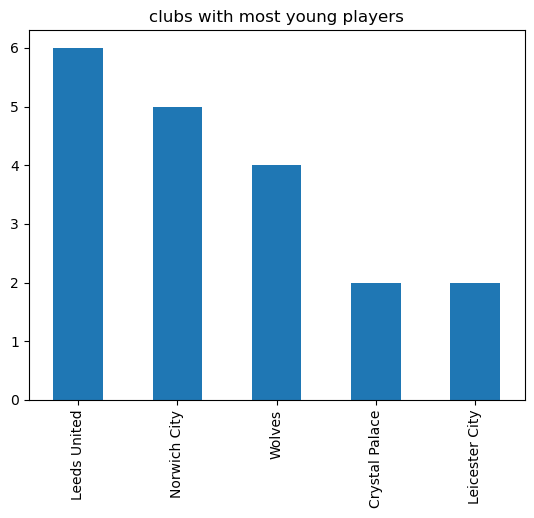

In [34]:
#club with most young players
club_most_young = Under20['club'].value_counts().idxmax()
print(club_most_young)

Under20['club'].value_counts().nlargest(5).plot(kind='bar', title='clubs with most young players')



In [41]:
#u20 players in leeds
Under20[Under20['club']=='Leeds United']



,players,nation,pos,club,age,weekly,mp,starts,minutes,90s,...,assists,nonpkg,pkmade,pkatt,yellowcrd,redcrd,shots,shtont,GoalPerGame,AssistPerGame
37,Charlie Cresswell,ENG,DF,Leeds United,18,2115,5,1,141,1.6,...,0,0,0,0,1,0,1,0,0.0,0.000000
217,Liam McCarron,SCO,FW,Leeds United,20,769,1,0,10,0.1,...,0,0,0,0,0,0,0,0,0.0,0.000000
252,Joe Gelhardt,ENG,FWMF,Leeds United,19,16538,20,5,746,8.3,...,2,2,0,0,4,0,22,9,0.1,0.100000
308,Kristoffer Klaesson,NOR,GK,Leeds United,20,10962,1,0,36,0.4,...,0,0,0,0,0,0,0,0,0.0,0.000000
446,Sam Greenwood,ENG,MFFW,Leeds United,19,1346,7,1,237,2.6,...,2,0,0,0,0,0,4,0,0.0,0.285714
466,Crysencio Summerville,NED,MFFW,Leeds United,19,5769,6,0,130,1.4,...,0,0,0,0,0,0,2,0,0.0,0.000000


In [40]:
#players between 30-35 in Liverpool
Between30_35[Between30_35['club']=='Liverpool']

,players,nation,pos,club,age,weekly,mp,starts,minutes,90s,...,assists,nonpkg,pkmade,pkatt,yellowcrd,redcrd,shots,shtont,GoalPerGame,AssistPerGame
368,Jordan Henderson,ENG,MF,Liverpool,31,140000,35,29,2597,28.9,...,5,2,0,0,3,0,31,6,0.057143,0.142857
433,James Milner,ENG,MFDF,Liverpool,35,140000,24,9,853,9.5,...,1,0,0,0,2,0,10,2,0.000000,0.041667


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Norwich City'),
  Text(1, 0, 'Wolves'),
  Text(2, 0, 'Brentford'),
  Text(3, 0, 'Manchester City'),
  Text(4, 0, 'Liverpool'),
  Text(5, 0, 'Chelsea'),
  Text(6, 0, 'Leicester City'),
  Text(7, 0, 'Crystal Palace'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Manchester Utd'),
  Text(10, 0, 'Southampton'),
  Text(11, 0, 'Everton'),
  Text(12, 0, 'Newcastle Utd'),
  Text(13, 0, 'Brighton'),
  Text(14, 0, 'Aston Villa'),
  Text(15, 0, 'Watford'),
  Text(16, 0, 'Arsenal'),
  Text(17, 0, 'Burnley'),
  Text(18, 0, 'West Ham'),
  Text(19, 0, 'Tottenham')])

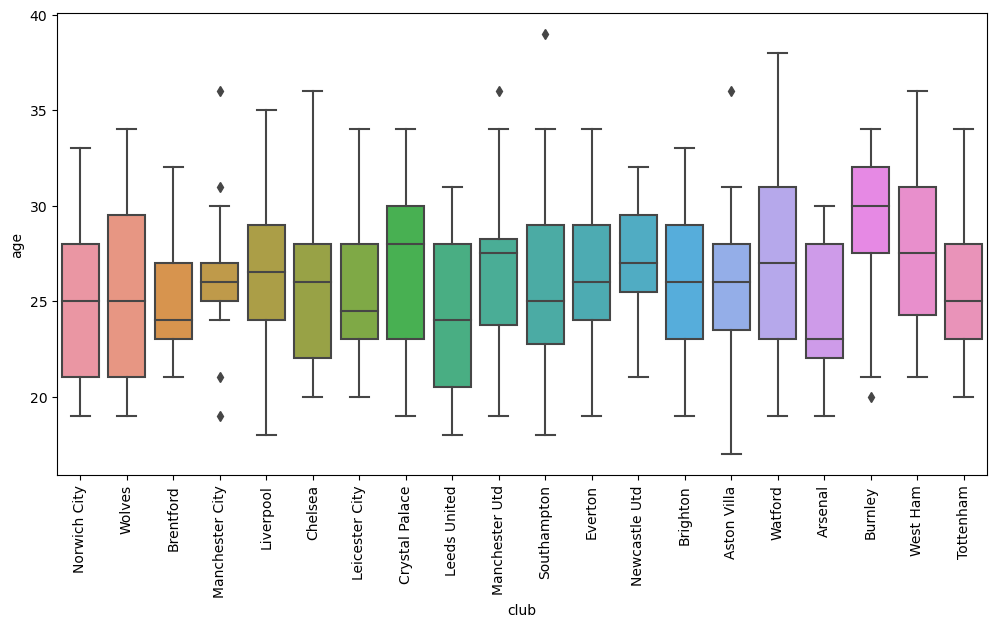

In [38]:
#average age of players in clubs
plt.figure(figsize=(12,6))
avgPl=sns.boxplot(x='club', y='age',data=epl)
plt.xticks(rotation=90)


In [43]:
#average age of players in clubs
numPlayer=epl.groupby('club').size()
data=epl.groupby('club')['age'].sum()/numPlayer
data.sort_values(ascending=False)

club
Burnley            28.956522
West Ham           27.500000
Newcastle Utd      27.370370
Watford            27.035714
Manchester Utd     26.958333
Manchester City    26.571429
Crystal Palace     26.565217
Everton            26.333333
Liverpool          26.250000
Southampton        26.083333
Chelsea            26.000000
Leicester City     25.884615
Aston Villa        25.826087
Brighton           25.714286
Wolves             25.454545
Brentford          25.285714
Tottenham          25.047619
Norwich City       24.708333
Arsenal            24.333333
Leeds United       24.043478
dtype: float64

<Axes: title={'center': 'Number of goals in each club'}, xlabel='club'>

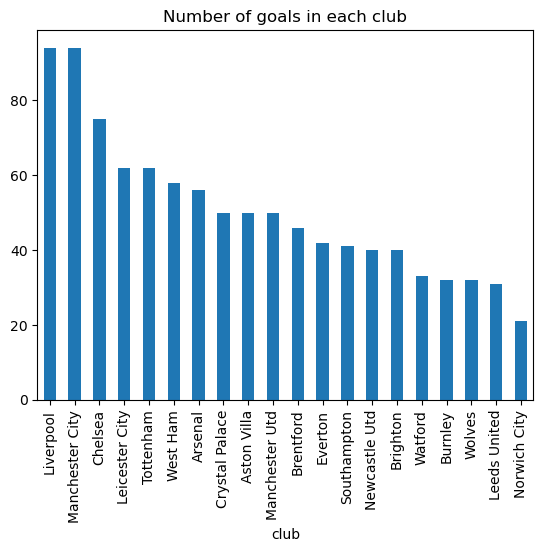

In [39]:
#Number of Goals scored in each club
goals_club = epl.groupby('club')['goals'].sum()
data_goals=goals_club.sort_values(ascending=False)
data_goals.plot(kind='bar', title='Number of goals in each club')

Text(0.5, 1.0, 'Plot of clubs vs total assists')

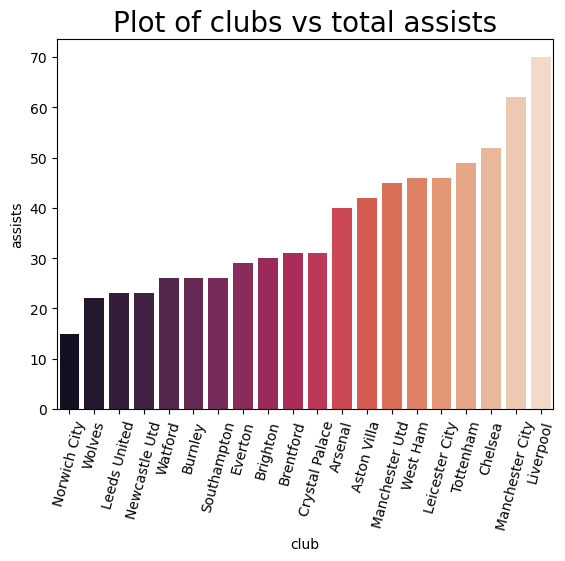

In [76]:
#assists per club
goals_by_club=pd.DataFrame(epl.groupby('club', as_index=False)['assists'].sum().sort_values(by='assists'))

ax=sns.barplot(x='club', y='assists', data=goals_by_club, palette='rocket')
plt.xticks(rotation=75)
plt.title('Plot of clubs vs total assists', fontsize=20)

In [77]:
#10 highest top scorers
top_10_players=epl[['players', 'club', 'goals','mp']].nlargest(n=10, columns='goals')
top_10_players

,players,club,goals,mp
224,Mohamed Salah,Liverpool,23,35
257,Son Heung-min,Tottenham,23,35
222,Cristiano Ronaldo,Manchester Utd,18,30
208,Harry Kane,Tottenham,17,37
213,Sadio Mane,Liverpool,16,34
206,Diogo Jota,Liverpool,15,35
229,Jamie Vardy,Leicester City,15,25
347,Kevin De Bruyne,Manchester City,15,30
238,Wilfried Zaha,Crystal Palace,14,33
226,Raheem Sterling,Manchester City,13,30


In [67]:
#10 players with most goals per game
maximum=epl[['players','club','GoalPerGame']].nlargest(n=5, columns='GoalPerGame')
maximum.sort_values(ascending=False, by='GoalPerGame')


,players,club,GoalPerGame
224,Mohamed Salah,Liverpool,0.657143
257,Son Heung-min,Tottenham,0.657143
222,Cristiano Ronaldo,Manchester Utd,0.600000
229,Jamie Vardy,Leicester City,0.600000
347,Kevin De Bruyne,Manchester City,0.500000


In [41]:
#adding shot efficiency to the data set
epl['ShotEff']=(epl['shtont'])/(epl['shots']).astype(float)
epl.head()

,players,nation,pos,club,age,weekly,mp,starts,minutes,90s,...,nonpkg,pkmade,pkatt,yellowcrd,redcrd,shots,shtont,GoalPerGame,AssistPerGame,ShotEff
0,Max Aarons,ENG,DF,Norwich City,21,22500,34,32,2881,32.0,...,0,0,0,8,0,13,2,0.000000,0.058824,0.153846
1,Rayan Ait Nouri,FRA,DF,Wolves,20,4423,23,20,1828,20.3,...,1,0,0,4,0,13,4,0.043478,0.086957,0.307692
2,Kristoffer Ajer,NOR,DF,Brentford,23,22115,24,23,1995,22.2,...,1,0,0,5,0,7,1,0.041667,0.125000,0.142857
3,Nathan Ake,NED,DF,Manchester City,26,92308,14,10,923,10.3,...,2,0,0,0,0,5,2,0.142857,0.000000,0.400000
4,Trent Alexander-Arnold,ENG,DF,Liverpool,22,180000,32,32,2853,31.7,...,2,0,0,2,0,51,14,0.062500,0.375000,0.274510


<Axes: title={'center': 'players with highest shot efficiency (atleast 10+ shots)'}, xlabel='players'>

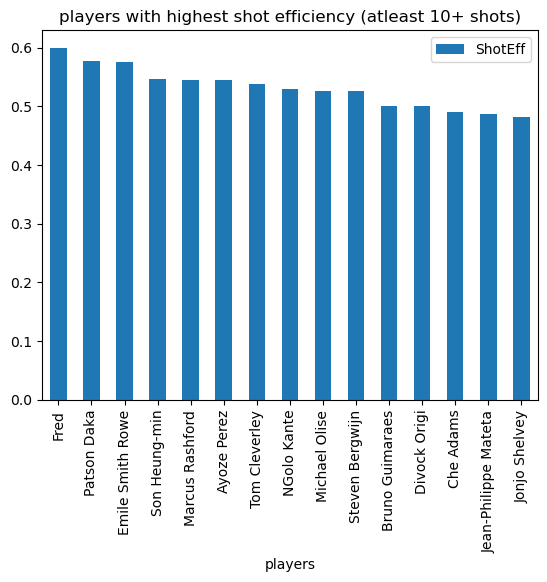

In [44]:
#Shot Efficiency of players with at least 10 shots 

shotsEff=epl[['players', 'pos', 'club','shots', 'shtont','ShotEff']].sort_values(ascending=False, by='ShotEff')
updated_shotsEff=shotsEff[shotsEff['shots']>=10].nlargest(n=15, columns='ShotEff')

updated_shotsEff.plot(x='players', y='ShotEff',kind='bar', title='players with highest shot efficiency (atleast 10+ shots)')
#plt.xticks(rotation=75)

In [137]:
#Highest earners in the league 
earners = epl[['players', 'club', 'weekly']]
earners.nlargest(n=10, columns='weekly')

,players,club,weekly
222,Cristiano Ronaldo,Manchester Utd,515385
347,Kevin De Bruyne,Manchester City,400000
303,David de Gea,Manchester Utd,375000
279,Jadon Sancho,Manchester Utd,350000
158,Raphael Varane,Manchester Utd,340000
211,Romelu Lukaku,Chelsea,325000
200,Jack Grealish,Manchester City,300000
226,Raheem Sterling,Manchester City,300000
457,Paul Pogba,Manchester Utd,290000
374,NGolo Kante,Chelsea,289423


Text(0, 0.5, 'clubs')

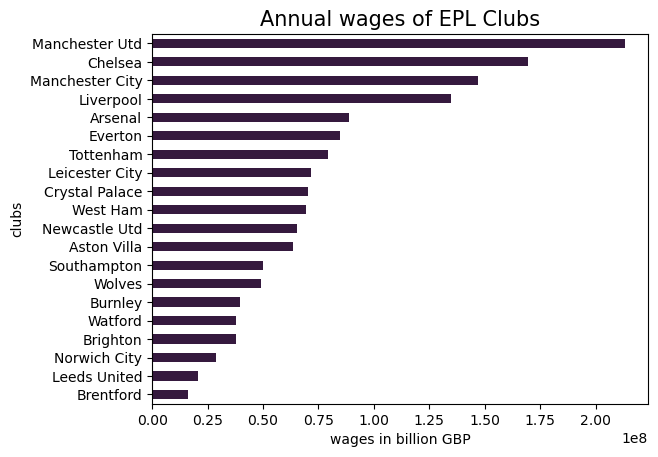

In [167]:
#Annual wages of each club
weekly_wages = epl.groupby('club')['weekly'].sum()
annual_wages=weekly_wages.sort_values(ascending=True)*52
titles=['annual wages in billion pounds', 'clubs']
annual_wages.plot(kind='barh')
plt.title('Annual wages of EPL Clubs', fontsize=15)
plt.xlabel("wages in billion GBP")
plt.ylabel("clubs")




In [48]:
#most shots by players 
maxshots=epl[['players','club','shots','shtont']].nlargest(n=10, columns='shots')
maxshots

,players,club,shots,shtont
224,Mohamed Salah,Liverpool,134,49
208,Harry Kane,Tottenham,131,51
222,Cristiano Ronaldo,Manchester Utd,108,39
213,Sadio Mane,Liverpool,99,37
278,Bukayo Saka,Arsenal,95,29
206,Diogo Jota,Liverpool,91,33
359,Bruno Fernandes,Manchester Utd,87,29
257,Son Heung-min,Tottenham,86,47
181,Michail Antonio,West Ham,83,27
227,Ivan Toney,Brentford,83,24


R2 Value:  0.9128446964926563


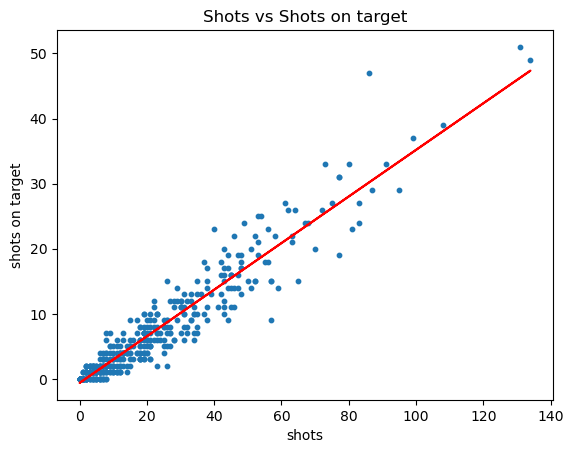

Equation of Best-Fit Line: y = 0.358x + -0.610


In [60]:
#Regression shots vs shots on target
X=epl['shots']
Y=epl['shtont']
X1=np.array(X)
Y1=np.array(Y)
X2 = X1[:, None] 
model = LinearRegression()
model.fit(X2, Y1)
model.score(X2, Y1)

#r2 value
y_pred = model.predict(X2)
r2 = r2_score(Y1, y_pred)
print('R2 Value: ', r2)

#plot the graph
plt.scatter(X2, Y1, label='Data', s=10)
plt.plot(X2, y_pred, color='red', label='Linear Regression')
plt.xlabel("shots")
plt.ylabel("shots on target")
plt.title("Shots vs Shots on target")
plt.show()


#equation of best fit line
slope = model.coef_[0]
intercept = model.intercept_
equation = f'y = {slope:.3f}x + {intercept:.3f}'
print('Equation of Best-Fit Line:', equation)


R2 value:  0.9496839004236558


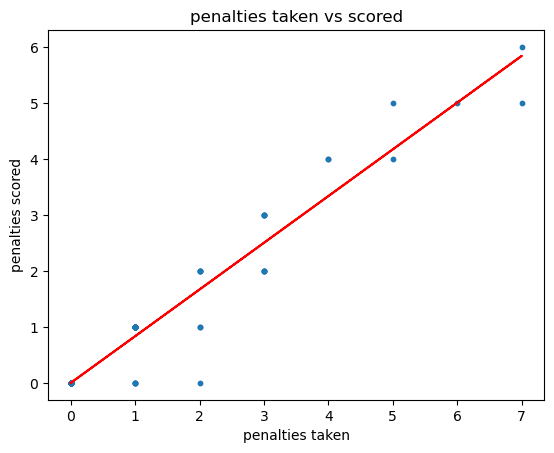

Equation of Best-Fit Line: y = 0.834x + -0.002
The percentage of penalty success is:  0.834401702230485


In [46]:
#Regression penalties taken vs penalties scored 
X=epl['pkatt']
Y=epl['pkmade']
X1=np.array(X)
Y1=np.array(Y)
X2 = X1[:, None] 
model = LinearRegression()
model.fit(X2, Y1)
model.score(X2, Y1)

#r2 value
y_pred = model.predict(X2)
r2 = r2_score(Y1, y_pred)
print('R2 value: ',r2)

#plot the graph
plt.scatter(X2, Y1, label='Data', s=10)
plt.plot(X2, y_pred, color='red', label='Linear Regression')
plt.xlabel("penalties taken")
plt.ylabel("penalties scored")
plt.title("penalties taken vs scored")
plt.show()


#equation of best fit line
slope = model.coef_[0]
intercept = model.intercept_
equation = f'y = {slope:.3f}x + {intercept:.3f}'
print('Equation of Best-Fit Line:', equation)


#Percentage of penalty success
print('The percentage of penalty success is: ', slope)